<a href="https://colab.research.google.com/github/arierahanyamtel/Pratikum-SPK/blob/main/Fuzzy_Moh_Harysakti_Rahanyamtel_G_231_22_0045.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q scikit-fuzzy --upgrade

import pandas as pd
import numpy as np
import skfuzzy as fuzz
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.4 MB/s eta 0:00:00


Saving UCI_Credit_Card.csv to UCI_Credit_Card.csv


In [2]:
base = pd.read_csv('/content/UCI_Credit_Card.csv')
print(base.shape)

(30000, 25)


In [3]:
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
base['BILL_TOTAL'] = base['BILL_AMT1'] + base['BILL_AMT2'] + base['BILL_AMT3'] + base['BILL_AMT4'] + base['BILL_AMT5'] + base['BILL_AMT6']

In [5]:
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,BILL_TOTAL
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,7704.0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,17077.0
2,3,90000.0,2,2,2,34,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,101653.0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,231334.0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,109339.0


In [6]:
X = base[['LIMIT_BAL', 'BILL_TOTAL']].values

print("1 X")
print(X[:5])

1 X
[[ 20000.   7704.]
 [120000.  17077.]
 [ 90000. 101653.]
 [ 50000. 231334.]
 [ 50000. 109339.]]


In [7]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

print("\n2 X")
print(X[:5])


2 X
[[-1.13672015 -0.69069198]
 [-0.3659805  -0.66599747]
 [-0.59720239 -0.44316987]
 [-0.90549825 -0.10150668]
 [-0.90549825 -0.42292   ]]


In [8]:
print("\nX.shape")
print(X.shape)

print("\nX.T.shape")
print(X.T.shape)



X.shape
(30000, 2)

X.T.shape
(2, 30000)


In [9]:
# jalankan fuzzy c means
r = fuzz.cmeans(
    data=X.T,
    c=3,
    m=2,
    error=0.005,
    maxiter=1000,
    init=None
)

print("1 r")
print(r)


1 r
(array([[ 0.97503936, -0.42055502],
       [-0.73894283, -0.30170864],
       [ 0.74999525,  2.01662265]]), array([[0.06226967, 0.12410014, 0.01588081, ..., 0.03498022, 0.02981405,
        0.01801126],
       [0.91181143, 0.84857771, 0.9791272 , ..., 0.95010602, 0.95613001,
        0.97293004],
       [0.02591891, 0.02732215, 0.00499199, ..., 0.01491376, 0.01405594,
        0.0090587 ]]), array([[0.35828845, 0.00447704, 0.46262728, ..., 0.05519472, 0.42621402,
        0.22015043],
       [0.30137927, 0.30238999, 0.21988165, ..., 0.77607026, 0.07930891,
        0.47379357],
       [0.34033228, 0.69313296, 0.31749107, ..., 0.16873502, 0.49447707,
        0.30605601]]), array([[2.1289674 , 1.3632961 , 1.57240439, ..., 2.03737769, 1.69999372,
        1.90720783],
       [0.55635855, 0.52135137, 0.20025392, ..., 0.39092802, 0.30019214,
        0.25949516],
       [3.29988599, 2.90548664, 2.80455357, ..., 3.12024944, 2.47586996,
        2.68928729]]), array([25823.80633695, 19998.3655458

In [10]:
previsoes_porcentagem = r[1]



In [11]:
print(previsoes_porcentagem.shape)

(3, 30000)


In [12]:
print(previsoes_porcentagem)

[[0.06226967 0.12410014 0.01588081 ... 0.03498022 0.02981405 0.01801126]
 [0.91181143 0.84857771 0.9791272  ... 0.95010602 0.95613001 0.97293004]
 [0.02591891 0.02732215 0.00499199 ... 0.01491376 0.01405594 0.0090587 ]]


In [13]:
print(previsoes_porcentagem[0][0])

0.062269666938759904


In [14]:
print(previsoes_porcentagem[1][0])

0.9118114253174592


In [15]:
print(previsoes_porcentagem[2][0])

0.02591890774378089


In [16]:
# Menghitung total dari tiga nilai derajat keanggotaan untuk data indeks ke-0 (target hasil = 1.0)
jumlah = previsoes_porcentagem[0][0] + previsoes_porcentagem[1][0] + previsoes_porcentagem[2][0]
print(jumlah)


1.0


In [17]:
# Mendapatkan indeks dari cluster dengan nilai keanggotaan maksimum untuk setiap entri data
hasil_klaster = previsoes_porcentagem.argmax(axis=0)
print(hasil_klaster)


[1 1 1 ... 1 1 1]


In [18]:
print(hasil_klaster[5000])


1


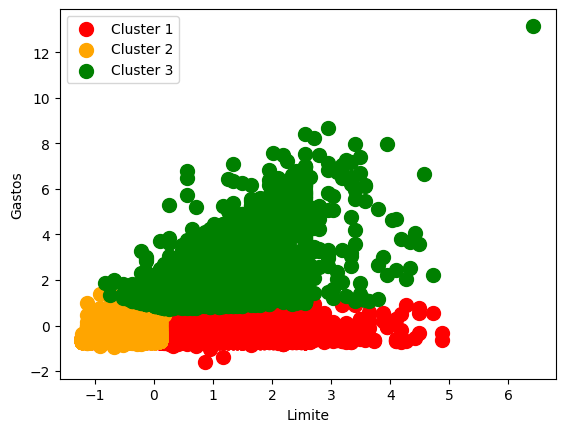

In [19]:
# Visualisasi hasil clustering
plt.scatter(X[hasil_klaster == 0, 0], X[hasil_klaster == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[hasil_klaster == 1, 0], X[hasil_klaster == 1, 1], s=100, c='orange', label='Cluster 2')
plt.scatter(X[hasil_klaster == 2, 0], X[hasil_klaster == 2, 1], s=100, c='green', label='Cluster 3')

plt.xlabel('Limite')
plt.ylabel('Gastos')
plt.legend()
plt.show()